External links : https://www.kaggle.com/sridm2007/svm-with-principal-component-analysis

In [64]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Applying PCA here
from sklearn.decomposition import PCA

In [16]:
sns.set(style="white")

In [30]:
df = pd.read_csv('../input/diabetes.csv')
df.head()
data=df

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


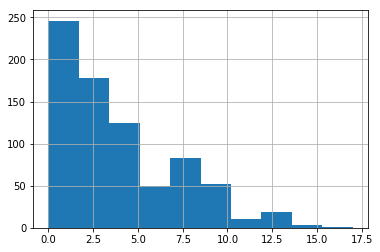

In [12]:
df['Pregnancies'].hist()

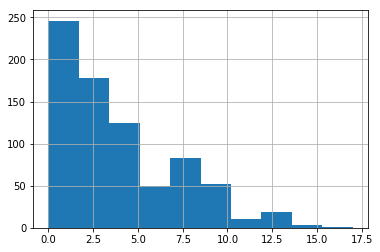

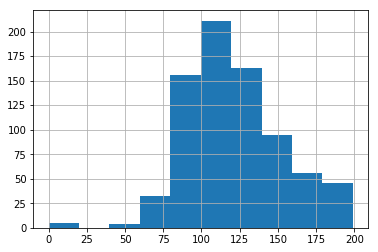

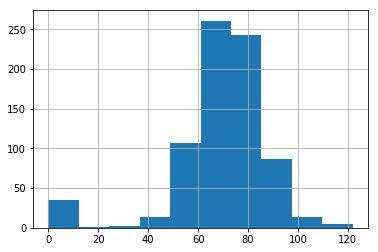

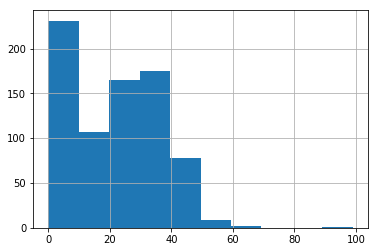

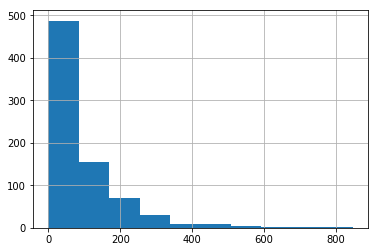

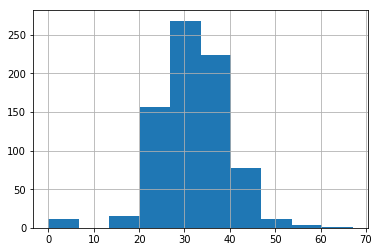

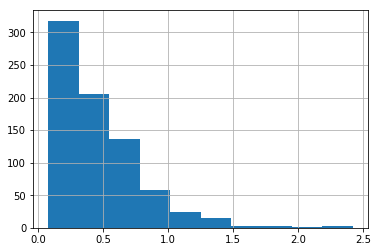

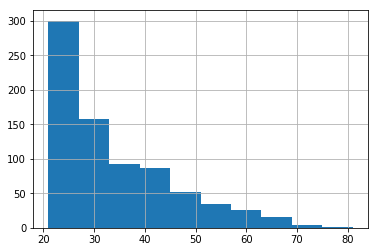

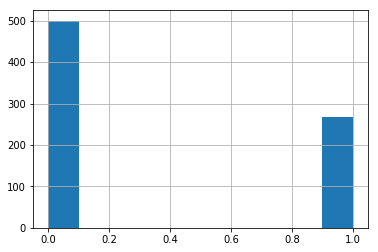

In [14]:
for c in df.columns:
    df[c].hist()
    plt.show()

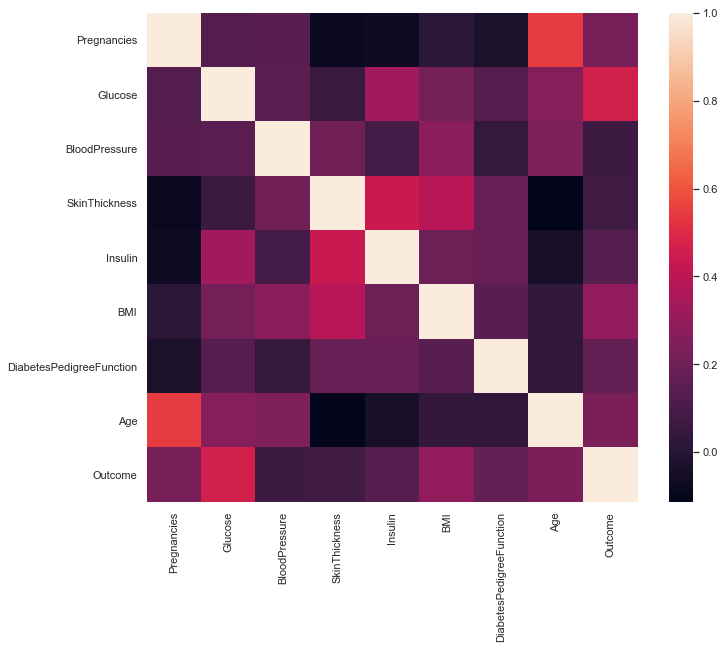

In [21]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr)

In [23]:
df.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


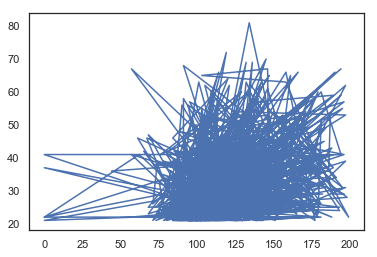

In [24]:
plt.plot(df['Glucose'],df['Age'])

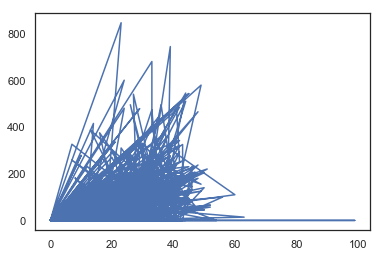

In [25]:
plt.plot(df['SkinThickness'],df['Insulin'])

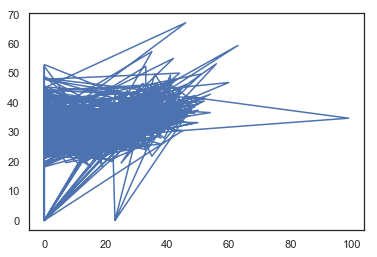

In [26]:
plt.plot(df['SkinThickness'],df['BMI'])

In [36]:
#Separate features and labels
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
#Test train split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [54]:
#Standard scaling
#Preprocessing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
pd.DataFrame(X_train).cov()

,0,1,2,3,4,5,6,7
0,1.001631,0.131244,0.154527,-0.098776,-0.113475,0.044348,-0.027211,0.524744
1,0.131244,1.001631,0.162501,0.081161,0.337051,0.232730,0.135950,0.249913
2,0.154527,0.162501,1.001631,0.208961,0.089336,0.314986,0.043277,0.238166
3,-0.098776,0.081161,0.208961,1.001631,0.438493,0.382856,0.160050,-0.129235
4,-0.113475,0.337051,0.089336,0.438493,1.001631,0.198282,0.162341,-0.069498
5,0.044348,0.232730,0.314986,0.382856,0.198282,1.001631,0.153299,0.052138
6,-0.027211,0.135950,0.043277,0.160050,0.162341,0.153299,1.001631,0.024046
7,0.524744,0.249913,0.238166,-0.129235,-0.069498,0.052138,0.024046,1.001631


In [56]:
X_test = sc.transform(X_test)

In [69]:

pca = PCA(n_components= None) #We will set it none so that we can see the variance explained and then choose no of comp.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26272308, 0.21748871, 0.12713965, 0.11201374, 0.09100458,
       0.0821533 , 0.05543671, 0.05204023])